#### Lab | Unsupervised learning intro (GNOD - part 4)

##### Instructions

It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of songs in the hope that the user will enjoy the new song.. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The activities you did with the Spotify API and the PopVortex web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the input song is in the PopVortex Hot 100.
2. Recommend another Hot 100 song
3. If it is NOT in the hot 100, then collect the audio features from the Spotify API for the input song.
4. You want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.
5. Then you recommend a song from the same cluster number.

Your model will be even more accurate the more songs you use to create your clusters in your model, so you want to have as many songs as possible to create the clustering model. You can find some larger datasets on Kaggle containing more songs with audio features that have already been scraped and saved as a .csv file. You can add these to your own scraped data. Here are some links to try:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading files:

hot_songs = pd.read_csv('hot_songs_not_cleaned.csv')

spotify_songs = pd.read_csv('df_audio_features.csv')

In [3]:
# Hot songs df:

hot_songs

,Title,Artist
0,Lovin On Me,Jack Harlow
1,Lil Boo Thang,Paul Russell
2,White Horse,Chris Stapleton
3,I Remember Everything (feat. Kacey Musgraves),Zach Bryan
4,Around Me the Cold Night,Luminara Stellaris
...,...,...
174,Mi Ex Tenia Razon,Karol G
175,Different 'Round Here,Riley Green Featuring Luke Combs
176,But I Got A Beer In My Hand,Luke Bryan
177,Better Than Ever,YoungBoy Never Broke Again & Rod Wave


In [4]:
hot_songs.duplicated(subset=['Title']).sum()

1

In [5]:
hot_songs.drop_duplicates(subset='Title', keep='first', inplace=True)

In [6]:
hot_songs.duplicated(subset=['Title']).sum()

0

In [7]:
# Checking for missing values:

hot_songs.isna().sum()

Title     0
Artist    0
dtype: int64

In [8]:
# Standardizing data:

hot_songs.columns = hot_songs.columns.str.lower()

In [9]:
hot_songs.head()

,title,artist
0,Lovin On Me,Jack Harlow
1,Lil Boo Thang,Paul Russell
2,White Horse,Chris Stapleton
3,I Remember Everything (feat. Kacey Musgraves),Zach Bryan
4,Around Me the Cold Night,Luminara Stellaris


In [10]:
hot_songs.rename(columns={'title': 'song'}, inplace=True)

In [11]:
hot_songs['song'] = hot_songs['song'].apply(str.lower)
hot_songs['artist'] = hot_songs['artist'].apply(str.lower)

In [12]:
hot_songs

,song,artist
0,lovin on me,jack harlow
1,lil boo thang,paul russell
2,white horse,chris stapleton
3,i remember everything (feat. kacey musgraves),zach bryan
4,around me the cold night,luminara stellaris
...,...,...
174,mi ex tenia razon,karol g
175,different 'round here,riley green featuring luke combs
176,but i got a beer in my hand,luke bryan
177,better than ever,youngboy never broke again & rod wave


In [13]:
# Saving final version:

hot_songs.to_csv('hot_songs_cleaned.csv', index=False)

In [14]:
# Spotify df:

spotify_songs

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,0,-6.839,1,0.0321,0.731000,...,0.1890,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,...,0.1380,0.767,116.835,audio_features,3oTlkzk1OtrhH8wBAduVEi,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,...,0.9220,0.175,163.219,audio_features,3ZFBeIyP41HhnALjxWy1pR,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,1,-10.934,1,0.0388,0.082200,...,0.0891,0.331,133.574,audio_features,5Qt4Cc66g24QWwGP3YYV9y,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,10,-10.851,1,0.0915,0.735000,...,0.3170,0.968,166.429,audio_features,7MH2ZclofPlTrZOkPzZKhK,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48572,Blue feat. Ilse de Lange,Zucchero,583qzYY2ARvSDchyq8PkTF,0.624,0.767,9,-4.902,1,0.0317,0.073400,...,0.1010,0.443,158.124,audio_features,583qzYY2ARvSDchyq8PkTF,spotify:track:583qzYY2ARvSDchyq8PkTF,https://api.spotify.com/v1/tracks/583qzYY2ARvS...,https://api.spotify.com/v1/audio-analysis/583q...,288693,4
48573,Blue feat. Ilse de Lange,Ilse DeLange,583qzYY2ARvSDchyq8PkTF,0.624,0.767,9,-4.902,1,0.0317,0.073400,...,0.1010,0.443,158.124,audio_features,583qzYY2ARvSDchyq8PkTF,spotify:track:583qzYY2ARvSDchyq8PkTF,https://api.spotify.com/v1/tracks/583qzYY2ARvS...,https://api.spotify.com/v1/audio-analysis/583q...,288693,4
48574,"All For Love - From ""The Three Musketeers"" Sou...",Bryan Adams,3sDWjYgYzAPUcwzuo6OGs8,0.462,0.548,2,-6.938,1,0.0276,0.184000,...,0.0961,0.127,149.905,audio_features,3sDWjYgYzAPUcwzuo6OGs8,spotify:track:3sDWjYgYzAPUcwzuo6OGs8,https://api.spotify.com/v1/tracks/3sDWjYgYzAPU...,https://api.spotify.com/v1/audio-analysis/3sDW...,282773,4
48575,"All For Love - From ""The Three Musketeers"" Sou...",Sting,3sDWjYgYzAPUcwzuo6OGs8,0.462,0.548,2,-6.938,1,0.0276,0.184000,...,0.0961,0.127,149.905,audio_features,3sDWjYgYzAPUcwzuo6OGs8,spotify:track:3sDWjYgYzAPUcwzuo6OGs8,https://api.spotify.com/v1/tracks/3sDWjYgYzAPU...,https://api.spotify.com/v1/audio-analysis/3sDW...,282773,4


In [15]:
# Checking for missing values:

spotify_songs.isna().sum()

track.name          2
name                2
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [16]:
spotify_songs.dropna(inplace=True)

In [17]:
spotify_songs.isna().sum()

track.name          0
name                0
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [18]:
# Standardizing data:

spotify_songs.comlumns = spotify_songs.columns.str.replace('.', '_')

In [19]:
spotify_songs.comlumns

Index(['track_name', 'name', 'song_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [20]:
# Checking for duplicates:

spotify_songs.duplicated(subset = 'song_id').sum()

5750

In [21]:
spotify_songs.drop_duplicates(subset='song_id', keep='first', inplace=True)

In [22]:
spotify_songs.duplicated(subset = 'song_id').sum()

0

In [23]:
spotify_songs.duplicated(subset = 'track.name').sum()

9364

In [24]:
spotify_songs.dtypes

track.name           object
name                 object
song_id              object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [25]:
# Selecting only the song features (numerical ones):

selected_features = spotify_songs.select_dtypes(include = np.number)

In [26]:
selected_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.5570,95.263,369600,4
1,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.7670,116.835,300977,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.1750,163.219,337413,4
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.3310,133.574,219147,4
4,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.9680,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48569,0.580,0.897,4,-12.105,1,0.0444,0.076700,0.042600,0.2070,0.7530,125.447,271800,4
48570,0.580,0.885,0,-5.154,0,0.0715,0.100000,0.001570,0.1460,0.7880,145.405,137933,4
48571,0.599,0.465,4,-4.950,1,0.0314,0.643000,0.000002,0.1490,0.0678,113.820,230880,4
48572,0.624,0.767,9,-4.902,1,0.0317,0.073400,0.000032,0.1010,0.4430,158.124,288693,4


In [27]:
# Scaling:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sp = scaler.fit_transform(selected_features)

standard_cluster = pd.DataFrame(X_sp,columns=selected_features.columns).head()

In [28]:
standard_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.619434,0.363971,-1.472376,0.462803,0.669814,-0.485918,1.638819,-0.454593,-0.011841,-0.035342,-0.979333,1.550000,0.202058
1,-0.600245,1.043499,-1.191933,-0.157812,0.669814,-0.200434,-0.905174,-0.390574,-0.337258,0.797440,-0.175996,0.748587,0.202058
2,-1.374208,-0.899377,-0.350604,-1.614326,-1.492953,0.094894,0.104045,-0.454175,4.665227,-1.550213,1.551335,1.174105,0.202058
3,-1.156730,-1.109934,-1.191933,-0.698722,0.669814,-0.375991,-0.619143,-0.454493,-0.649275,-0.931575,0.447361,-0.207064,0.202058
4,-0.389164,0.531460,1.332053,-0.675179,0.669814,0.488664,1.652740,-0.454348,0.804891,1.594531,1.670875,-0.887383,0.202058


In [29]:
# Saving the scaler:

import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [30]:
# Saving the scaled df as csv:

standard_cluster.to_csv('std_features.csv')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

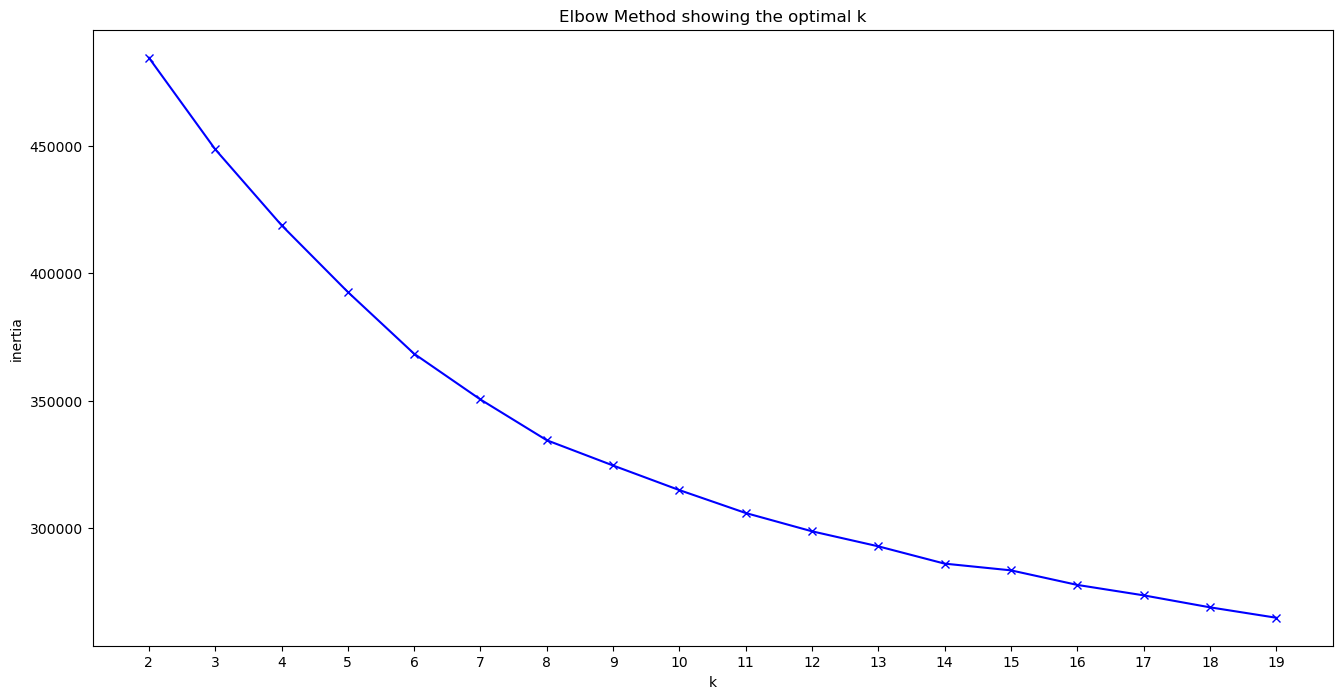

In [31]:
# Inertia:

from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_sp)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [32]:
# In this method we do not see a clear elbow to decide about the number of clusters. We can maybe see a small change
# by 8. Maybe we can try and test with 8 but let's see the silhouette score.

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

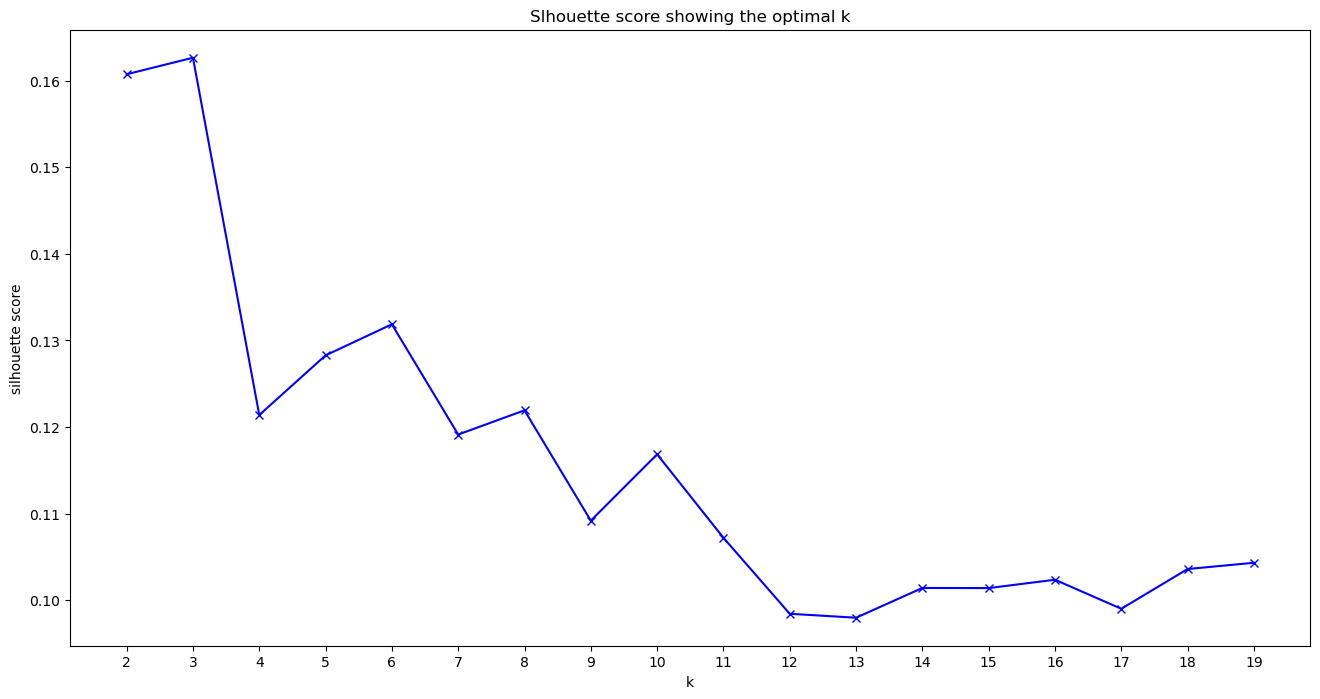

In [33]:
# Silhouette score:

from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_sp)
    silhouette.append(silhouette_score(X_sp, kmeans.predict(X_sp)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [34]:
# Saving Kmeans model:

pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))

In [35]:
# Here we can see the highest pick in 3 but since we have a lot of songs, we want to have more clusters.

# We see a pick in 3, 6, 8, 10, 14 and 16-18.

# Let´s try, first of all, with 10.

In [36]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_sp)
clusters = kmeans.predict(X_sp)
pd.Series(clusters).value_counts().sort_index()

0    2253
1     681
2    8891
3    6141
4    2300
5    5643
6    7151
7    1673
8    3999
9    4093
Name: count, dtype: int64

In [37]:
# We can see by cluster number a larger amount of songs than the others and by 1 significantly less.

# Let´s try to increase the number of clusters.

In [38]:
# Let´s try with the las pick on 18:

kmeans = KMeans(n_clusters=18, random_state=1234)
kmeans.fit(X_sp)
clusters = kmeans.predict(X_sp)
pd.Series(clusters).value_counts().sort_index()

0     2789
1     3940
2     2929
3     2615
4     1153
5     3621
6     2858
7      498
8     4257
9     1944
10    2947
11    1133
12     172
13    3589
14    2260
15    1549
16    1846
17    2725
Name: count, dtype: int64

In [39]:
# In this case, we see a good distribution except for the clusters 7 and 12. Let´s create a new column
# with the cluster number and see what´s in there.

In [40]:
spotify_songs['cluster']=clusters

In [41]:
spotify_songs[spotify_songs['cluster']==7]

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
93,Runaway,Kanye West,0jOL63hLMeSCHTXPdFkniq,0.383,0.579,1,-3.765,0,0.1030,0.19800,...,0.103,86.522,audio_features,0jOL63hLMeSCHTXPdFkniq,spotify:track:0jOL63hLMeSCHTXPdFkniq,https://api.spotify.com/v1/tracks/0jOL63hLMeSC...,https://api.spotify.com/v1/audio-analysis/0jOL...,547733,4,7
121,Pyramids,Frank Ocean,0rbK15g3UsDTVy1EuwgKYz,0.400,0.650,5,-6.104,0,0.0466,0.01180,...,0.150,107.989,audio_features,0rbK15g3UsDTVy1EuwgKYz,spotify:track:0rbK15g3UsDTVy1EuwgKYz,https://api.spotify.com/v1/tracks/0rbK15g3UsDT...,https://api.spotify.com/v1/audio-analysis/0rbK...,592920,4,7
126,Rapper's Delight - Long Version,The Sugarhill Gang,0RxphrRef802DdWKfTZiVG,0.847,0.828,9,-8.510,1,0.2960,0.38500,...,0.884,111.045,audio_features,0RxphrRef802DdWKfTZiVG,spotify:track:0RxphrRef802DdWKfTZiVG,https://api.spotify.com/v1/tracks/0RxphrRef802...,https://api.spotify.com/v1/audio-analysis/0Rxp...,873733,4,7
160,Marquee Moon - 2003 Remaster,Television,3MWdMCAIFPzcIUdiEi8Pao,0.494,0.657,7,-7.543,1,0.0397,0.06320,...,0.737,118.194,audio_features,3MWdMCAIFPzcIUdiEi8Pao,spotify:track:3MWdMCAIFPzcIUdiEi8Pao,https://api.spotify.com/v1/tracks/3MWdMCAIFPzc...,https://api.spotify.com/v1/audio-analysis/3MWd...,645000,4,7
180,Purple Rain,Prince,78tohUCFtANyQCWrbGgHMH,0.371,0.532,10,-8.736,1,0.0315,0.05270,...,0.183,112.923,audio_features,78tohUCFtANyQCWrbGgHMH,spotify:track:78tohUCFtANyQCWrbGgHMH,https://api.spotify.com/v1/tracks/78tohUCFtANy...,https://api.spotify.com/v1/audio-analysis/78to...,527827,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48331,July Morning,Uriah Heep,1R6b8rKPXRihtAO1iHpQw4,0.232,0.574,5,-7.742,1,0.0368,0.00134,...,0.181,155.696,audio_features,1R6b8rKPXRihtAO1iHpQw4,spotify:track:1R6b8rKPXRihtAO1iHpQw4,https://api.spotify.com/v1/tracks/1R6b8rKPXRih...,https://api.spotify.com/v1/audio-analysis/1R6b...,525760,4,7
48491,Under The Pressure,The War On Drugs,5j58jhAFzAy0keSuQYsQBn,0.324,0.710,6,-6.545,1,0.0297,0.30900,...,0.195,134.385,audio_features,5j58jhAFzAy0keSuQYsQBn,spotify:track:5j58jhAFzAy0keSuQYsQBn,https://api.spotify.com/v1/tracks/5j58jhAFzAy0...,https://api.spotify.com/v1/audio-analysis/5j58...,532307,4,7
48551,Yours Is No Disgrace - 2003 Remaster,Yes,2ab1xYXLiGMWKBKlMgoB62,0.409,0.628,2,-9.625,1,0.0578,0.00409,...,0.801,141.225,audio_features,2ab1xYXLiGMWKBKlMgoB62,spotify:track:2ab1xYXLiGMWKBKlMgoB62,https://api.spotify.com/v1/tracks/2ab1xYXLiGMW...,https://api.spotify.com/v1/audio-analysis/2ab1...,580960,4,7
48554,And You and I - 2003 Remaster,Yes,2IDIxX8L57lsOczvSMQRFd,0.291,0.437,9,-10.486,1,0.0363,0.19900,...,0.219,78.170,audio_features,2IDIxX8L57lsOczvSMQRFd,spotify:track:2IDIxX8L57lsOczvSMQRFd,https://api.spotify.com/v1/tracks/2IDIxX8L57ls...,https://api.spotify.com/v1/audio-analysis/2IDI...,607787,3,7


In [42]:
# These songs in cluster (7-12) have similar levels of danceability, energy, acousticness, etc. 

# But this doesn't necessarily mean they are musically similar, but they share commonalities in their audio features.

In [43]:
# Selecting the columns that we want for our final df with cluster:

df_with_cluster = spotify_songs[['track.name', 'name', 'cluster']]

In [44]:
df_with_cluster

,track.name,name,cluster
0,Like a Rolling Stone,Bob Dylan,5
1,Smells Like Teen Spirit,Nirvana,1
2,A Day In The Life - Remastered,The Beatles,9
3,Good Vibrations (Mono),The Beach Boys,5
4,Johnny B Goode,Chuck Berry,6
...,...,...,...
48569,Legs - Remix,ZZ Top,1
48570,Tush - 2006 Remaster,ZZ Top,0
48571,Control,Zoe Wees,5
48572,Blue feat. Ilse de Lange,Zucchero,8


In [45]:
# Standardizing columns similar to hot_songs:

In [46]:
df_with_cluster=df_with_cluster.rename(columns={'track.name': 'song', 'name': 'artist'})

In [47]:
df_with_cluster ['song'] = df_with_cluster ['song'].apply(str.lower)
df_with_cluster ['artist'] = df_with_cluster ['artist'].apply(str.lower)

In [48]:
df_with_cluster

,song,artist,cluster
0,like a rolling stone,bob dylan,5
1,smells like teen spirit,nirvana,1
2,a day in the life - remastered,the beatles,9
3,good vibrations (mono),the beach boys,5
4,johnny b goode,chuck berry,6
...,...,...,...
48569,legs - remix,zz top,1
48570,tush - 2006 remaster,zz top,0
48571,control,zoe wees,5
48572,blue feat. ilse de lange,zucchero,8


In [49]:
# Saving final df with cluster:

df_with_cluster.to_csv('df_with_cluster.csv', index=False)